# <center>Prediction of Campus Placement
</center>


In this project we used logistic regression machine learning algorithm or RandonForestClassification to predict the placement of students, Using  [Kaggle dataset](https://www.kaggle.com/benroshan/factors-affecting-campus-placement).

The Dataset consists of the qualitative and the quantitative parameters of the students that are necessary for improving the prediction.

## Section 1 : Business Understanding

First we analyze some important Question to understand the data for better prediction.

## Questions

   1. Which factor influenced a candidate in getting placed?
   
   or
  
    Does percentage matters for one to get placed?
   2. what is the percentage of female or male how get a placement?
   3. Which degree specialization is much demanded by corporate?
   4. Predictiction model using differnt ML algorithms?

## Section 2: Data Understanding

What is in it?

This data set consists of Placement data of students in campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

This data set consists columns are

sscb- Secondary School Certificate Board-> Which is lower secondary school(1st-10th Grade)

hscb-Higher Secondary Certificate Board-> Which is higher secondary school(11th and 12th Grade)

sl_no : serial number<br>
gender : [male,female]<br>
ssc_p :	means--> 10th class percentage   <br>
ssc_b : which board to passed out 10th.	<br>
hsc_p : means--> 12th class percentage	<br>
hsc_b : which board to passed out 12th.	<br>
hsc_s :	which stream he choose (science,commerce,arts) <br>
degree_p : means--> Bachelor degree percentage<br>
degree_t : which strem choose for bachelor <br>
workex : It has a work experience or not.<br>
etest_p : entrance test percentage<br>
specialisation : Master degree in Mkt&HR or Mkt&Fin <br>
mba_p :	means--> Master degree percentage<br>
status : He/She got placed or not in campus placement.	<br>
salary : placement packages.<br>

Grade represents their year of study in school.
Boards are different curriculum/education system adapted by educational institutions.

### 2.1 Gathering data

In [4]:
#load the dataset
df=pd.read_csv("dataset/Placement_Data_Full_Class.csv")
#see the 5 first data
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
#set the sl_no as a row no
df.set_index('sl_no',inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
#check datatype or null 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [7]:
#see some statics data
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### 2.2 cleaning the  data

In [8]:
#check number of rows and columns
print(df.shape[0]) #no of rows
print(df.shape[1]) #no of columns

215
14


In [9]:
# check null values in df
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

 only salary Column has 67 null values<br>
so we delete or replace this null value with some value like mean, median or 0.

Salary null value fill with salary mean value because it is average of salary column and it gives better performance in prediction time if use this column.

In [10]:
#fill salary null value with mode 
df["salary"]=df["salary"].fillna(df["salary"].mean())

In [11]:
#check datatypes
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

### 2.3 Handling with Catagorical Data

In [12]:
# we convert object type data into numerical datatype
    
df['gender']=df['gender'].astype('category')
df['status']=df['status'].astype('category')
df['workex']=df['workex'].astype('category')
df['hsc_b']=df['hsc_b'].astype('category')
df['ssc_b']=df['ssc_b'].astype('category')

In [13]:
#check how many unique data in these dataframe

print(df['gender'].unique())
print(df['status'].unique())
print(df['workex'].unique())
print(df['hsc_b'].unique())
print(df['ssc_b'].unique())

[M, F]
Categories (2, object): [M, F]
[Placed, Not Placed]
Categories (2, object): [Placed, Not Placed]
[No, Yes]
Categories (2, object): [No, Yes]
[Others, Central]
Categories (2, object): [Others, Central]
[Others, Central]
Categories (2, object): [Others, Central]


In [14]:
# Replace the value in 0,1 or quantitative parameters
df["gender"].replace(["F","M"],[0,1],inplace=True)
df["status"].replace(['Placed',"Not Placed"],[1,0],inplace=True)

df['workex'].replace(to_replace ="Yes", value =1,inplace=True) 
df['workex'].replace(to_replace ="No", value =0,inplace=True)

In [15]:
df["gender"].dtype

dtype('int64')

In [16]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.000000
2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.000000
3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.000000
4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,288655.405405
5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.000000


In [17]:
#create a new dataframe of only numerical values
numerical_df=df.select_dtypes(["float64","int64"])

 # 3.  Visualizing the data

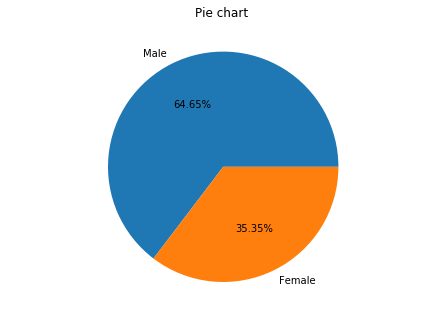

In [18]:
# show the percentage of male or female
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
gender = ['Male','Female']
students = [139,76]
ax.pie(students, labels = gender,autopct='%1.2f%%',colors = ["#1f77b4", "#ff7f0e"])
plt.title('Pie chart ')
plt.show()

Number of not placed Student 67
Number of placed Student 0


/home/rahish/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


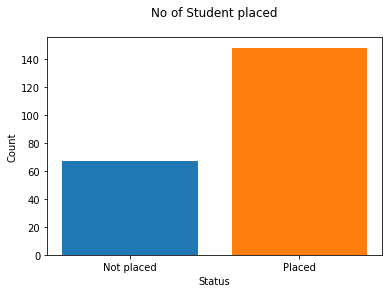

In [19]:
#show the no. of student how placed or not placed.

print("Number of not placed Student "+ str(len(df[df["status"]==0])))
print("Number of placed Student "+ str(len(df[df["status"]=="Placed"])))

plt.bar([0],height=len(df[df["status"]==0]))
plt.bar([1],height=len(df[df["status"]==1]))

plt.xlabel("Status")
plt.ylabel("Count")

plt.xticks(np.arange(2), ('Not placed', 'Placed'))
plt.title("No of Student placed\n")
plt.show()

scc_p mean = 67.3033953488372
hsc_p mean = 66.33316279069766
mba_p mean = 62.278186046511586
degree_p mean = 66.37018604651163


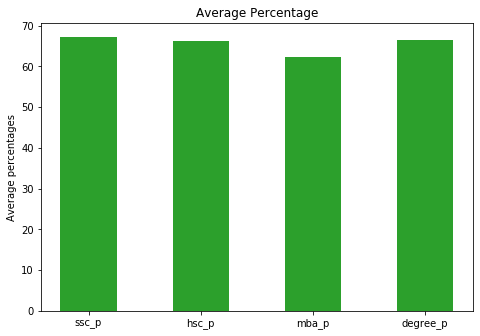

In [20]:
#average percentage of all education qualification
values = [(numerical_df['ssc_p'].mean()),(numerical_df['hsc_p'].mean()),(numerical_df['mba_p'].mean()),(numerical_df['degree_p'].mean())]
print('scc_p mean = ' +str(numerical_df['ssc_p'].mean()))
print('hsc_p mean = ' +str(numerical_df['hsc_p'].mean()))
print('mba_p mean = ' +str(numerical_df['mba_p'].mean()))
print('degree_p mean = ' +str(numerical_df['degree_p'].mean()))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['ssc_p','hsc_p','mba_p','degree_p']
ax.set_ylabel('Average percentages')
ax.set_title('Average Percentage')
ax.bar(names,values,width = 0.5,color=["#2ca02c"])
plt.show()

  # Questions 1.
  # Which factor influenced a candidate in getting placed?
 or
  # Does percentage matters for one to get placed?
   


In [21]:
#show the relation between diffrent qualification placement status usinng correlation.

print('ssc_p to placement ', round(numerical_df['status'].corr(numerical_df['ssc_p'])*100,1),'%')
print('hsc_p to placement ', round(numerical_df['status'].corr(numerical_df['hsc_p'])*100,1),'%')
print('mba_p to placement ', round(numerical_df['status'].corr(numerical_df['mba_p'])*100,1),'%')
print('degree_p to placement ', round(numerical_df['status'].corr(numerical_df['degree_p'])*100,1),'%')
print('etest_p to placement ', round(numerical_df['status'].corr(numerical_df['etest_p'])*100,1),'%')

print('workexp to placement ', round(numerical_df['status'].corr(numerical_df['workex'])*100,1),'%')

ssc_p to placement  60.8 %
hsc_p to placement  49.1 %
mba_p to placement  7.7 %
degree_p to placement  48.0 %
etest_p to placement  12.8 %
workexp to placement  27.6 %


In [22]:
df_grade = df.groupby(['status']).mean()[['hsc_p', 'degree_p', 'mba_p']].reset_index()
df_grade.head()

,status,hsc_p,degree_p,mba_p
0,0,58.395522,61.134179,61.612836
1,1,69.926554,68.740541,62.579392


In [23]:
#Student Grades and Campus Placement
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
plotly.offline.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
%matplotlib inline

trace1 = go.Bar(
    x = ['High School', 'Bachelor', 'MBA'],
    y = df_grade[df_grade['status']==0].drop('status', axis=1).values[0],
    name = 'Not Placed'
)

trace2 = go.Bar(
    x = ['High School', 'Bachelor', 'MBA'],
    y = df_grade[df_grade['status']==1].drop('status', axis=1).values[0],
    name = 'Placed'
)

data = [trace1, trace2]

layout = go.Layout(
    yaxis = dict(title = 'Grade'),
    xaxis = dict(title = 'Stage'),
    title = 'Student Grades and Campus Placement')
fig = go.Figure(data=data, layout=layout)
fig.show()

Answer <br>
See the Above graph We can say percentage matter. and 
   ssc_p feature data factor influenced a candidate in getting placed.
<br>
when we see the correlation between features and placement then it show me the ssc_p data to more correlated to placcement.<br>
I know it is some tricky to say that senior secondary(ssc_p)percentage is not so much help in real world placement.<br>
After see the correlation between features and placement the we definatly say the 
       percentage matters for get a placed

## 2.Question
## what is the percentage of female or male how  get the placement?

In [24]:
def count_genderwise_status(gender=0,status=0):
    '''
    dtype(int,boolen) gender : male for 1, female for 0
    dtype(int,boolen) status : placed for 1, not place for 0
    
    return : return the total number of status(placed or not placed) with respect to gender
    
    Example :
     
          if gender is female and status is placed then
          gender=0 ,placed=1
          
          count_genderwise_status(0,1)
          
          here : O for Female
                 1 for placed
          
          return int type
          
   means : 48 female has placed.

   Example 2:
          
          count_genderwise_status(1,0)
          
          here : 1 for male
                 0 for not placed
          return total number of male person who has not placed. 
    '''   
    i=0
    for j in range(len(df)):
        j=j+1
        if df['gender'][j]==gender and df['status'][j]==status:
            i+=1

    if gender==0 and status==0:
        print("Total female who don't get placement is "+str(i))
    if gender==0 and status==1:
        print("Total female who get placement is "+str(i))
    if gender==1 and status==0:
        print("Total male who don't get placement is "+str(i))
    if gender==1 and status==1:
        print("Total male who get placement is "+str(i))
    

    return i

In [25]:
not_placed_female=count_genderwise_status(0,0)
placed_female=count_genderwise_status(0,1)
not_placed_male=count_genderwise_status(1,0)
placed_male=count_genderwise_status(1,1)

Total female who don't get placement is 28
Total female who get placement is 48
Total male who don't get placement is 39
Total male who get placement is 100


Not place female 28
place female     48
Total female     76


Not placed male  39
Placed male      100
Total male       139


Total Not placed 67
Total placed     148


Total student    215


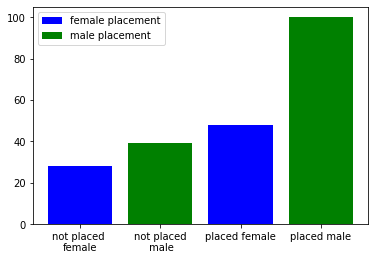

In [26]:
print("Not place female "+str(not_placed_female))
print("place female     "+str(placed_female))
print("Total female     "+str(len(df[df["gender"]==0])))
print("\n")
print("Not placed male  "+str(not_placed_male))
print("Placed male      "+str(placed_male))
print("Total male       "+str(len(df[df["gender"]==1])))
print("\n")
print("Total Not placed "+str(len(df[df["status"]==0])))
print("Total placed     "+str(len(df[df["status"]==1])))
print("\n")
print("Total student    "+str(len(df)))


plt.bar([0,2],height=[not_placed_female,placed_female],color='b',align='center')
plt.xticks(range(0,5),['not placed \nfemale','not placed\n male','placed female','placed male'])
plt.bar([1,3],height=[not_placed_male,placed_male],color='g',align='center')

plt.legend(['female placement', 'male placement'])
#To show the plot finally we have used plt.show().
plt.show()

In [27]:
#calculate percentage
print((placed_female/len(df))*100)
print((placed_male/len(df))*100)
print(((not_placed_female+not_placed_male)/len(df))*100)

22.325581395348838
46.51162790697674
31.16279069767442


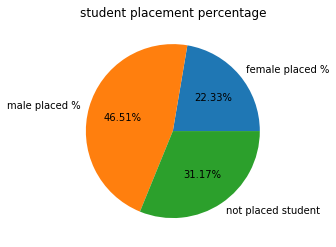

In [28]:
#plot pie chart of placeement
plt.pie([22.33,46.51,31.17],
        labels=["female placed %","male placed %",'not placed student'],
        autopct='%1.2f%%')
plt.title('student placement percentage')
plt.show()

we see the above pie chart easly to know the percentage of the female placed percentage is 22.33%, and male placed percentage is 46.51% or not placed student percentage is 31.17%.

# Question 3.
   # Which degree specialization is much demanded by corporate?
    

specialisation in Mkt&Fin 120
specialisation in Mkt&HR 95


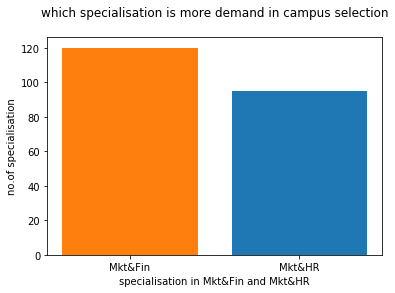

In [29]:
# which specialisation is more demand in campus selection

plt.bar([1],height=len(df[df["specialisation"]=="Mkt&HR"]))
plt.bar([0],height=len(df[df["specialisation"]=="Mkt&Fin"]))
plt.xlabel("specialisation in Mkt&Fin and Mkt&HR")
plt.ylabel("no.of specialisation")

print("specialisation in Mkt&Fin "+ str(len(df[df["specialisation"]=="Mkt&Fin"])))
print("specialisation in Mkt&HR "+ str(len(df[df["specialisation"]=="Mkt&HR"])))
plt.xticks(np.arange(2), ('Mkt&Fin', 'Mkt&HR'))
plt.title("which specialisation is more demand in campus selection\n")
plt.show()

# 4 Placement Prediction 

## Question 4. Predictiction model using differnt ML algorithms?

Train the data and create a model to predict the placed or not.


### 4.0 Splitting the dataset into the Training set and Test set


In [30]:
x_train , x_test , y_train , y_test = train_test_split(
    df[['ssc_p','hsc_p','degree_p','workex','etest_p','mba_p']],
    df.status,
    test_size=0.2)

In [31]:
len(y_train)

172

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### 4.1 logistic regresssion model

In [33]:
# create a logistic regresssion model and fit it.
def lr_model(x_train,y_train,x_test,y_test):
    
    '''
    Input
      x_train :training featue
      x_test  :test featue
      y_train :training output data
      y_test  :testing  output data
      
      
    Output :
     accuracy_score       :
     classification_report:
    '''
    
    print("Using Logistic Regression Method")
    model=LogisticRegression()
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    print('Accuracy {0:.2f}%'.format((accuracy_score(y_test,prediction)*100)))
    print(classification_report(y_test,prediction))

### 4.3 Random Forest Classification  model

In [34]:
# Fitting Random Forest Classification to the Training set
def rfc_model(x_train,y_train,x_test,y_test):
    
    '''
    Input
      x_train :training featue
      x_test  :test featue
      y_train :training output data
      y_test  :testing  output data
      
      
    Output :
     accuracy_score       :
     classification_report:
    '''
    
    print("using Random Forest Classification method")
    model=RandomForestClassifier(n_estimators =14, criterion = 'entropy', random_state = 41)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    print('Accuracy {0:.2f}%'.format((accuracy_score(y_test,prediction)*100)))
    print(classification_report(y_test,prediction))



# Result

In [35]:
lr_model(x_train,y_train,x_test,y_test)

Using Logistic Regression Method
Accuracy 90.70%
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.92      0.92      0.92        25

    accuracy                           0.91        43
   macro avg       0.90      0.90      0.90        43
weighted avg       0.91      0.91      0.91        43



/home/rahish/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [36]:
rfc_model(x_train,y_train,x_test,y_test)

using Random Forest Classification method
Accuracy 88.37%
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.88      0.92      0.90        25

    accuracy                           0.88        43
   macro avg       0.88      0.88      0.88        43
weighted avg       0.88      0.88      0.88        43



we can see the prediction and say that Random Forest Classification  model is better perform then logistic regression model.<br>
and the accuracy score in 90.70%.